### Auxiliar helps

**Mistral GPT**
- [Chat de mucha ayuda](https://chat.mistral.ai/chat/ca2c680a-db36-49d8-ab11-3ada57e3f6da)
- [API keys Mistral](https://console.mistral.ai/api-keys/)

**Ligas de aprendizaje**


- [Tokenizer mistral](https://docs.mistral.ai/guides/tokenization/)
- [Tokenizer mistral colab](https://colab.research.google.com/github/mistralai/mistral-common/blob/main/examples/tokenizer.ipynb#scrollTo=ed997bda-93f7-435a-b529-e7a80c8dbff5)
- [Embeddings mistral](https://docs.mistral.ai/capabilities/embeddings/)
- [Embeddings mistral colab](https://colab.research.google.com/github/mistralai/cookbook/blob/main/mistral/embeddings/embeddings.ipynb)
- [Basic RAG mistral](https://docs.mistral.ai/guides/rag/)
- [Basic RAG mistral colab](https://colab.research.google.com/github/mistralai/cookbook/blob/main/mistral/rag/basic_RAG.ipynb)


- [Mistral Models cathalog](https://docs.mistral.ai/getting-started/models/models_overview/)

- [HyDE model](https://arxiv.org/pdf/2212.10496)

- [Mixtral model](https://huggingface.co/mistralai/Mixtral-8x7B-Instruct-v0.1)
- [Large model](https://mistral.ai/news/mistral-large/)

# Start

In [1]:
from utilities.utils import pdf_processing
from utilities.configure_script import ConfigurationLoader

In [2]:
configs = ConfigurationLoader.get_config()

In [3]:
import pandas as pd
import ast
import os
import base64
from typing import List
import json
from PIL import Image

In [19]:
df = pd.read_csv(configs['paths']['recepies_path']['csv_ingredients'], usecols=['Title', 'Ingredients', 'Instructions', 'Image_Name'])
df['Ingredients'] = df['Ingredients'].apply(lambda x: ast.literal_eval(x))
images = os.listdir(configs['paths']['recepies_path']['images_folder'])
images_processed = [img.replace('.jpg','') for img in images]
final_df = df[df['Image_Name'].isin(images_processed)].copy()
list_descriptions = []
for index, row in final_df.iterrows():
    dish = row['Image_Name']
    image = Image.open(row['Image_paths']).convert("RGB")
    description = generate_image_description(image, processor_blip, model_blip, device)
    list_descriptions.append(dish+ ' ' + description)
final_df['Image_descriptions'] = list_descriptions

In [5]:
def df_processing_0(dataframe_path:str, img_folder_path:str)->pd.DataFrame:
    dataframe = pd.read_csv(dataframe_path, usecols=['Title', 'Ingredients', 'Instructions', 'Image_Name'])
    dataframe['Ingredients'] = dataframe['Ingredients'].apply(lambda x: ast.literal_eval(x))
    images = os.listdir(img_folder_path)
    images_processed = [img.replace('.jpg','') for img in images]
    final_df = dataframe[dataframe['Image_Name'].isin(images_processed)].copy()
    list_descriptions = []
    for index, row in final_df.iterrows():
        dish = row['Image_Name']
        image = Image.open(row['Image_paths']).convert("RGB")
        description = generate_image_description(image, processor_blip, model_blip, device)
        list_descriptions.append(dish+ ' ' + description)
    final_df['Image_descriptions'] = list_descriptions
    return final_df

In [6]:
final_df.shape

(13276, 4)

In [7]:
final_df

,Title,Ingredients,Instructions,Image_Name
0,Miso-Butter Roast Chicken With Acorn Squash Pa...,"[1 (3½–4-lb.) whole chicken, 2¾ tsp. kosher sa...","Pat chicken dry with paper towels, season all ...",miso-butter-roast-chicken-acorn-squash-panzanella
1,Crispy Salt and Pepper Potatoes,"[2 large egg whites, 1 pound new potatoes (abo...",Preheat oven to 400°F and line a rimmed baking...,crispy-salt-and-pepper-potatoes-dan-kluger
2,Thanksgiving Mac and Cheese,"[1 cup evaporated milk, 1 cup whole milk, 1 ts...",Place a rack in middle of oven; preheat to 400...,thanksgiving-mac-and-cheese-erick-williams
3,Italian Sausage and Bread Stuffing,"[1 (¾- to 1-pound) round Italian loaf, cut int...",Preheat oven to 350°F with rack in middle. Gen...,italian-sausage-and-bread-stuffing-240559
4,Newton's Law,"[1 teaspoon dark brown sugar, 1 teaspoon hot w...",Stir together brown sugar and hot water in a c...,newtons-law-apple-bourbon-cocktail
...,...,...,...,...
13496,Brownie Pudding Cake,"[1 cup all-purpose flour, 2/3 cup unsweetened ...",Preheat the oven to 350°F. Into a bowl sift to...,brownie-pudding-cake-14408
13497,Israeli Couscous with Roasted Butternut Squash...,"[1 preserved lemon, 1 1/2 pound butternut squa...",Preheat oven to 475°F.\nHalve lemons and scoop...,israeli-couscous-with-roasted-butternut-squash...
13498,Rice with Soy-Glazed Bonito Flakes and Sesame ...,[Leftover katsuo bushi (dried bonito flakes) f...,"If using katsuo bushi flakes from package, moi...",rice-with-soy-glazed-bonito-flakes-and-sesame-...
13499,Spanakopita,[1 stick (1/2 cup) plus 1 tablespoon unsalted ...,Melt 1 tablespoon butter in a 12-inch heavy sk...,spanakopita-107344


In [8]:
final_df.columns

Index(['Title', 'Ingredients', 'Instructions', 'Image_Name'], dtype='object')

In [9]:
final_df['Image_Name'][0]

'miso-butter-roast-chicken-acorn-squash-panzanella'

In [18]:
def create_text_1(title_string: str, ingredients_string: str, instructions_string: str, img_description_string: str)->str:
    '''
    This function convert the three columns into a single string text to process into a json,
    this will to help us to create the text database.
    '''

    dish_name = 'Dish name: ' +  title_string + ' \n\n '
    ingredients_string = dish_name + 'List of ingredients: '+ " \n ".join(ingredients_string)
    ingredients_string = ingredients_string + " \n\n"
    semifinal_text = ingredients_string + 'Preparation instructions: ' + instructions_string
    final_text = semifinal_text + '\n\n' + 'Image description: ' + img_description_string

    return final_text


In [11]:
def encode_image_2(image_path:str)->str:
    '''
    This function convert the image into a base64 representation
    '''
    with open(image_path, "rb") as image_file:
        return base64.b64encode(image_file.read()).decode('utf-8')

In [12]:
def write_json_3(save_path:str, list_file: List):
    '''
    This function save a file into a json type
    '''
    with open(save_path, 'w', encoding='utf-8') as f:
        json.dump(list_file, f, ensure_ascii=False, indent=4)
    return print('File Created')

In [13]:
def convert_df2json(dataframe: pd.DataFrame, img_folder_path: str, save_file_path:str):
    '''
    This function process a csv and convert into a json file readable for llms
    '''
    recetario = []
    for index, row in dataframe.iterrows():
        dic = {}
        dic['Recepie'] = create_text_1(row['Title'], row['Ingredients'], row['Instructions'])
        dic['Image'] = row['Image_Name']
        dic['Image_base64'] = encode_image_2(img_folder_path + row['Image_Name'] + '.jpg')
        recetario.append(dic)
    write_json_3(save_file_path, recetario) 
    

In [14]:
recetario = []
for index, row in df.iterrows():
    dic = {}
    dic['Recepie'] = create_text_1(row['Title'], row['Ingredients'], row['Instructions'])
    dic['Image'] = row['Image_Name']
    dic['Image_base64'] = encode_image_2(configs['paths']['recepies_path']['images_folder'] + row['Image_Name'] + '.jpg')
    recetario.append(dic)
    if index == 2:
        break
write_json_3(configs['paths']['recepies_path']['recepies_json'], recetario)

File Created


In [ ]:
recetario = []
for index, row in df.iterrows():
    dic = {}
    dic['Recepie'] = create_text_1(row['Title'], row['Ingredients'], row['Instructions'], row['Image_descroption'])
    dic['Image'] = row['Image_Name']
    dic['Image_base64'] = encode_image_2(configs['paths']['recepies_path']['images_folder'] + row['Image_Name'] + '.jpg')
    recetario.append(dic)
    if index == 2:
        break
write_json_3(configs['paths']['recepies_path']['recepies_json'], recetario)

In [15]:
recetario

[{'Recepie': 'Dish name: Miso-Butter Roast Chicken With Acorn Squash Panzanella \n\n List of ingredients: 1 (3½–4-lb.) whole chicken \n 2¾ tsp. kosher salt, divided, plus more \n 2 small acorn squash (about 3 lb. total) \n 2 Tbsp. finely chopped sage \n 1 Tbsp. finely chopped rosemary \n 6 Tbsp. unsalted butter, melted, plus 3 Tbsp. room temperature \n ¼ tsp. ground allspice \n Pinch of crushed red pepper flakes \n Freshly ground black pepper \n ⅓ loaf good-quality sturdy white bread, torn into 1" pieces (about 2½ cups) \n 2 medium apples (such as Gala or Pink Lady; about 14 oz. total), cored, cut into 1" pieces \n 2 Tbsp. extra-virgin olive oil \n ½ small red onion, thinly sliced \n 3 Tbsp. apple cider vinegar \n 1 Tbsp. white miso \n ¼ cup all-purpose flour \n 2 Tbsp. unsalted butter, room temperature \n ¼ cup dry white wine \n 2 cups unsalted chicken broth \n 2 tsp. white miso \n Kosher salt, freshly ground pepper \n\nPreparation instructions: Pat chicken dry with paper towels, seas

### Chunking

In [1]:
from mistral_common.tokens.tokenizers.mistral import MistralTokenizer

from mistral_common.protocol.instruct.messages import UserMessage
from mistral_common.protocol.instruct.request import ChatCompletionRequest

from typing import List, Tuple, Optional, Union
import numpy as np
from tqdm import tqdm
import json
from utilities.utils import pdf_processing
from utilities.configure_script import ConfigurationLoader
from sentence_transformers import SentenceTransformer

import torch
print(torch.cuda.is_available()) 

d:\Proyectos\Docker\Multimodal_RAG\amb_mulrimodalrag\Lib\site-packages\sentence_transformers\cross_encoder\CrossEncoder.py:13: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange


True


In [59]:
class Chunk_processing:
    def __init__(self, json_file, output_save_file,tokenizer, embedding_model, device, context_chunking = True):
        self.data = json_file
        self.save_file_path = output_save_file
        self.tokenizer = tokenizer
        self.model = embedding_model
        self.device = device
        self.flag = context_chunking
        pass

    def token_count(self, text: str) -> Tuple[List[int],int]:
        """
        Cuenta el número de tokens en el texto dado.
        
        Parameters:
        text (str): Texto a contar los tokens.

        Returns:
        int: Número de tokens en el texto.
        """

        # Crea una solicitud de tokenización para el texto
        request = ChatCompletionRequest(messages=[UserMessage(content=str(text))])
        tokenized = self.tokenizer.encode_chat_completion(request)
        tokens = tokenized.tokens
        return tokens, len(tokenized.tokens)

    def chunk_by_token_count(self, text: str, max_tokens=4000) -> List[str]:
        """
        Divide el texto en chunks basados en un límite máximo de tokens.

        Parameters:
        text (str): Texto a dividir en chunks.
        max_tokens (int): Límite de tokens por chunk.

        Returns:
        list: Lista de chunks de texto.
        """
        token_list, token_count = self.token_count(text)

        if token_count > max_tokens: 
            print('Spliting in chunks...')

            chunks = []
            current_chunk = []
            
            for token in token_list:
                current_chunk.append(token)
                if len(current_chunk) == max_tokens:
                    chunk_text = self.tokenizer.decode(current_chunk).replace('[INST] ', '').replace(' [/INST]', '')
                    chunks.append(chunk_text)
                    current_chunk = []

            if current_chunk:
                chunks.append(self.tokenizer.decode(current_chunk).replace('[INST] ', '').replace(' [/INST]', ''))
            
            # print('chunks in this document: ', len(chunks))

        else:
            # print('Is no necesary splitting into chunks')
            chunks = [text]

        return chunks

    def contextual_chunking(self, text: str, max_tokens: int) -> List[str]:
        """
        Realiza un chunkeo del texto basado en contexto, considerando un máximo de tokens.

        Parameters:
        text (str): Texto a dividir en chunks contextuales.
        max_tokens (int): Límite de tokens por chunk.

        Returns:
        list: Lista de chunks contextuales de texto.
        """

        labels = ['Dish name: ', '\n\n List of ingredients: ', '\n\nPreparation instructions: ', '\n\nImage description: ']
        chunks = []
        current_position = 0

        for label in labels:
            start = text.find(label, current_position)
            if start != -1:
                if current_position != start:
                    chunk = text[current_position:start].strip()
                    if self.token_count(chunk)[1] > max_tokens:
                        chunks.extend(self.chunk_by_token_count(chunk, max_tokens))
                    else:
                        chunks.append(chunk)
                current_position = start + len(label)

        if current_position < len(text):
            chunk = text[current_position:].strip().replace('-', ' ')
            if self.token_count(chunk)[1] > max_tokens:
                chunks.extend(self.chunk_by_token_count(chunk, max_tokens))
            else:
                chunks.append(chunk)
        
        return chunks

    def create_embedding(self, chunks: str) -> List[float]:
        """
        Template para la creación de embeddings, implementado en otro script.

        Parameters:
        chunk (str): Chunk de texto para generar un embedding.

        Returns:
        List[float]: Embedding del chunk de texto o un template si no está implementado.
        """
        embeddings = self.model.encode(chunks, device=self.device)        
        return [embedding.tolist() for embedding in np.array(embeddings)]

    def write_json_3(self, list_file: List):
        '''
        This function saves a list into a json file.
        '''
        with open(self.save_file_path, 'w', encoding='utf-8') as f:
            json.dump(list_file, f, ensure_ascii=False, indent=4)
        print(f'File Created at {self.save_file_path}')

    def create_chunking_pipeline(self):
        '''
        '''
        new_list = []
        for dic in tqdm(self.data, desc='Chunking docs and calculation of embeddings'):
            if self.flag:
                chunks = [item for sublist in self.contextual_chunking(text=dic['Recepie'], max_tokens=4000) for item in (sublist if isinstance(sublist, list) else [sublist])]
                dic['Chunks'] = chunks
            else:
                chunks = [item for sublist in self.chunk_by_token_count(text=dic['Recepie'], max_tokens=4000) for item in (sublist if isinstance(sublist, list) else [sublist])]
                dic['Chunks'] = chunks
            dic['Embeddings'] = self.create_embedding(chunks=chunks)
            new_list.append(dic)
        print('saving it into a new JSON file')
        self.write_json_3(new_list)
        print('finished!!!')

In [60]:
configs = ConfigurationLoader.get_config()

In [61]:
def read_json(file_path):
    with open(file_path, 'r', encoding='utf-8') as json_file:
        data = json.load(json_file, strict=False)
    return data

def save_json(output_file_path, list):
    with open(output_file_path, 'w', encoding='utf-8') as f:
        json.dump(list, f, ensure_ascii=False, indent=4)
    return print(f'file created at: {output_file_path}')

In [62]:
configs['paths']['recepies_path']['recepies_json'], configs['paths']['recepies_path']['recepies_chunked_json']

('.\\assets\\recepies.json', '.\\assets\\recepies_chunked.json')

In [63]:
recepies = read_json(configs['paths']['recepies_path']['recepies_json'])

device = "cuda" if torch.cuda.is_available() else "cpu"

tokenizer = MistralTokenizer.v3()
model_name = "open-mistral-7b"
tokenizer = MistralTokenizer.from_model(model_name)

model = SentenceTransformer('sentence-transformers/all-MiniLM-L6-v2').to(device)

In [64]:
chunker = Chunk_processing(recepies,
                           configs['paths']['recepies_path']['recepies_chunked_json'],
                           tokenizer,
                           model,
                           device,
                           context_chunking = False)

In [45]:
%%time
chunker.create_chunking_pipeline()

Chunking docs and calculation of embeddings: 100%|██████████| 13276/13276 [01:16<00:00, 173.86it/s]


File Created at .\assets\recepies_chunked.json
finished!!!
CPU times: total: 13.3 s
Wall time: 1min 38s


In [65]:
%%time
chunker.create_chunking_pipeline()

Chunking docs and calculation of embeddings:  68%|██████▊   | 9002/13276 [00:51<00:26, 164.38it/s]

Spliting in chunks...
Spliting in chunks...


Chunking docs and calculation of embeddings: 100%|██████████| 13276/13276 [01:15<00:00, 176.67it/s]


saving it into a new JSON file
File Created at .\assets\recepies_chunked.json
finished!!!
CPU times: total: 15 s
Wall time: 1min 22s


In [66]:
chunked_recepies = read_json(configs['paths']['recepies_path']['recepies_chunked_json'])

In [50]:
chunked_recepies[0]['Chunks']

['Miso-Butter Roast Chicken With Acorn Squash Panzanella',
 '• 1 (3½–4-lb.) whole chicken \n• 2¾ tsp. kosher salt, divided, plus more \n• 2 small acorn squash (about 3 lb. total) \n• 2 Tbsp. finely chopped sage \n• 1 Tbsp. finely chopped rosemary \n• 6 Tbsp. unsalted butter, melted, plus 3 Tbsp. room temperature \n• ¼ tsp. ground allspice \n• Pinch of crushed red pepper flakes \n• Freshly ground black pepper \n• ⅓ loaf good-quality sturdy white bread, torn into 1" pieces (about 2½ cups) \n• 2 medium apples (such as Gala or Pink Lady; about 14 oz. total), cored, cut into 1" pieces \n• 2 Tbsp. extra-virgin olive oil \n• ½ small red onion, thinly sliced \n• 3 Tbsp. apple cider vinegar \n• 1 Tbsp. white miso \n• ¼ cup all-purpose flour \n• 2 Tbsp. unsalted butter, room temperature \n• ¼ cup dry white wine \n• 2 cups unsalted chicken broth \n• 2 tsp. white miso \n• Kosher salt, freshly ground pepper',
 'Pat chicken dry with paper towels, season all over with 2 tsp. salt, and tie legs togeth

In [49]:
len(chunked_recepies[0]['Embeddings'])

4

In [12]:
for recepie in recepies[:3]:
    print(recepie['Recepie'], '\n\n')

Dish name: Miso-Butter Roast Chicken With Acorn Squash Panzanella 

 List of ingredients: 
• 1 (3½–4-lb.) whole chicken 
• 2¾ tsp. kosher salt, divided, plus more 
• 2 small acorn squash (about 3 lb. total) 
• 2 Tbsp. finely chopped sage 
• 1 Tbsp. finely chopped rosemary 
• 6 Tbsp. unsalted butter, melted, plus 3 Tbsp. room temperature 
• ¼ tsp. ground allspice 
• Pinch of crushed red pepper flakes 
• Freshly ground black pepper 
• ⅓ loaf good-quality sturdy white bread, torn into 1" pieces (about 2½ cups) 
• 2 medium apples (such as Gala or Pink Lady; about 14 oz. total), cored, cut into 1" pieces 
• 2 Tbsp. extra-virgin olive oil 
• ½ small red onion, thinly sliced 
• 3 Tbsp. apple cider vinegar 
• 1 Tbsp. white miso 
• ¼ cup all-purpose flour 
• 2 Tbsp. unsalted butter, room temperature 
• ¼ cup dry white wine 
• 2 cups unsalted chicken broth 
• 2 tsp. white miso 
• Kosher salt, freshly ground pepper 

Preparation instructions: Pat chicken dry with paper towels, season all over wit

In [19]:
%%time
sentences = ["This is an example sentence", "Each sentence is converted"]
# Verifica si tienes una GPU disponible
device = "cuda" if torch.cuda.is_available() else "cpu"

model = SentenceTransformer('sentence-transformers/all-MiniLM-L6-v2').to(device)
embeddings = model.encode(sentences, device=device)

CPU times: total: 15.6 ms
Wall time: 1.27 s


In [14]:
ls = [[1,2],1]
[item for sublist in ls for item in (sublist if isinstance(sublist, list) else [sublist])]

[1, 2, 1]

miqueas 6:8

### Adding image descriptions

In [22]:
from transformers import BlipProcessor, BlipForConditionalGeneration
from PIL import Image
import requests
import torch

d:\Proyectos\Docker\Multimodal_RAG\amb_mulrimodalrag\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [23]:
# Verificar si la GPU está disponible y mover el modelo
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# Cargar el modelo y el procesador
processor_blip = BlipProcessor.from_pretrained("Salesforce/blip-image-captioning-base")
model_blip = BlipForConditionalGeneration.from_pretrained("Salesforce/blip-image-captioning-base")
model_blip.to(device)

BlipForConditionalGeneration(
  (vision_model): BlipVisionModel(
    (embeddings): BlipVisionEmbeddings(
      (patch_embedding): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
    )
    (encoder): BlipEncoder(
      (layers): ModuleList(
        (0-11): 12 x BlipEncoderLayer(
          (self_attn): BlipAttention(
            (dropout): Dropout(p=0.0, inplace=False)
            (qkv): Linear(in_features=768, out_features=2304, bias=True)
            (projection): Linear(in_features=768, out_features=768, bias=True)
          )
          (layer_norm1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
          (mlp): BlipMLP(
            (activation_fn): GELUActivation()
            (fc1): Linear(in_features=768, out_features=3072, bias=True)
            (fc2): Linear(in_features=3072, out_features=768, bias=True)
          )
          (layer_norm2): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        )
      )
    )
    (post_layernorm): LayerNorm((768,), eps=1e-0

In [70]:
# Función para generar la descripción de una imagen
def generate_image_description(image, processor, model, device, max_length=100, num_beams=7, temperature=1.0, top_p=0.9):
    inputs = processor(image, return_tensors="pt").to(device)
    
    # Generar la descripción con parámetros ajustados
    outputs = model.generate(
        **inputs,
        max_length=max_length,           # Incrementa la longitud máxima
        num_beams=num_beams,             # Beam search para exploración más detallada
        temperature=temperature,         # Controla la creatividad
        top_p=top_p,                     # Nucleus sampling para generar texto más variado
        repetition_penalty=5.0,          # Penaliza la repetición de palabras
        do_sample=True
    )
    
    description = processor.decode(outputs[0], skip_special_tokens=True)
    return description

In [71]:
df = pd.read_csv(configs['paths']['recepies_path']['csv_ingredients'], usecols=['Title', 'Ingredients', 'Instructions', 'Image_Name'])
df['Ingredients'] = df['Ingredients'].apply(lambda x: ast.literal_eval(x))
images = os.listdir(configs['paths']['recepies_path']['images_folder'])
images_processed = [img.replace('.jpg','') for img in images]
final_df = df[df['Image_Name'].isin(images_processed)].copy()

In [97]:
final_df['Image_paths'] = final_df['Image_Name'].apply(lambda name: os.path.join(configs['paths']['recepies_path']['images_folder'], name +'.jpg'))

In [100]:
list_descriptions = []
for index, row in final_df.iterrows():
    dish = row['Image_Name']
    image = Image.open(row['Image_paths']).convert("RGB")
    description = generate_image_description(image, processor_blip, model_blip, device)
    list_descriptions.append(dish+ ' ' + description)
final_df['Image_descriptions'] = list_descriptions

In [82]:
images_full_path = [os.path.join(configs['paths']['recepies_path']['images_folder'], image_name) for image_name in images]

for img in images_full_path[:3]:
    dish =img.split(os.sep)[-1].replace('.jpg', '').replace('-', ' ')
    image = Image.open(img).convert("RGB")
    description = generate_image_description(image, processor_blip, model_blip, device)
    print(dish+ ' ' + description)
    # print(description)

amaro spiked mocha with caramelized brioche a white plate topped with two small cups filled with chocolate
amatriciana em guanciale tomato and pecorino romano em 51221210 a bowl of spaghetti with meat and vegetables
amayas migas a pan of food sitting on top of a table


In [ ]:
filename='winter-fruit-kefir-salad.jpg'
image_path = os.path.join('D:\\Proyectos\\Docker\\Multimodal_RAG\\RAGer_targaryen\\assets\\recepies\\Food_Images',
                          filename)
image = Image.open(image_path)

description = generate_image_description(image, processor_blip, model_blip, max_length=50, num_beams=12)
print(f"Descripción de {filename}: {description}")

In [22]:
from transformers import VisionEncoderDecoderModel, ViTImageProcessor, AutoTokenizer


In [17]:
from transformers import BlipProcessor, BlipForConditionalGeneration
from PIL import Image
import requests
import torch
print(torch.cuda.is_available()) 

True


In [19]:
# Verificar si la GPU está disponible y mover el modelo
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [48]:
# Cargar el modelo y el procesador
processor_blip = BlipProcessor.from_pretrained("Salesforce/blip-image-captioning-base")
model_blip = BlipForConditionalGeneration.from_pretrained("Salesforce/blip-image-captioning-base")
model_blip.to(device)

BlipForConditionalGeneration(
  (vision_model): BlipVisionModel(
    (embeddings): BlipVisionEmbeddings(
      (patch_embedding): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
    )
    (encoder): BlipEncoder(
      (layers): ModuleList(
        (0-11): 12 x BlipEncoderLayer(
          (self_attn): BlipAttention(
            (dropout): Dropout(p=0.0, inplace=False)
            (qkv): Linear(in_features=768, out_features=2304, bias=True)
            (projection): Linear(in_features=768, out_features=768, bias=True)
          )
          (layer_norm1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
          (mlp): BlipMLP(
            (activation_fn): GELUActivation()
            (fc1): Linear(in_features=768, out_features=3072, bias=True)
            (fc2): Linear(in_features=3072, out_features=768, bias=True)
          )
          (layer_norm2): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        )
      )
    )
    (post_layernorm): LayerNorm((768,), eps=1e-0

In [ ]:
{'max_length': 100, 'num_beams': 5, 'temperature': 1.0, 'top_k': 150, 'top_p': 0.9, 'do_sample': True}

In [52]:
# Función para generar la descripción de una imagen
def generate_image_description(image, processor, model, max_length=150, num_beams=5, temperature=1.0, top_p=0.9):
    inputs = processor(image, return_tensors="pt").to(device)
    
    # Generar la descripción con parámetros ajustados
    outputs = model.generate(
        **inputs,
        max_length=max_length,           # Incrementa la longitud máxima
        num_beams=num_beams,             # Beam search para exploración más detallada
        temperature=temperature,         # Controla la creatividad
        top_p=top_p,                     # Nucleus sampling para generar texto más variado
        repetition_penalty=1           # Penaliza la repetición de palabras
    )
    
    description = processor.decode(outputs[0], skip_special_tokens=True)
    return description

In [53]:
filename='winter-fruit-kefir-salad.jpg'
image_path = os.path.join('D:\\Proyectos\\Docker\\Multimodal_RAG\\RAGer_targaryen\\assets\\recepies\\Food_Images',
                          filename)
image = Image.open(image_path)

description = generate_image_description(image, processor_blip, model_blip, max_length=50, num_beams=12)
print(f"Descripción de {filename}: {description}")

In [54]:
description = generate_image_description(image, processor_blip, model_blip, max_length=50, num_beams=12)
print(f"Descripción de {filename}: {description}")

Descripción de winter-fruit-kefir-salad.jpg: a bowl filled with fruit and vegetables on top of a wooden cutting board


In [20]:
# Cargar el modelo y el tokenizer
feature_extractor = ViTImageProcessor.from_pretrained("nlpconnect/vit-gpt2-image-captioning")
tokenizer = AutoTokenizer.from_pretrained("nlpconnect/vit-gpt2-image-captioning")
model = VisionEncoderDecoderModel.from_pretrained("nlpconnect/vit-gpt2-image-captioning").to(device)

# Función para generar la descripción de la imagen
def generate_image_description_vit(image):
    # Procesar la imagen y convertirla al formato requerido por el modelo
    inputs = feature_extractor(images=image, return_tensors="pt").to(device)
    # Generar la descripción usando el modelo
    output_ids = model.generate(inputs["pixel_values"], max_length=50, num_beams=4)
    # Decodificar la salida en texto legible
    description = tokenizer.decode(output_ids[0], skip_special_tokens=True)
    return description

# Ruta de la imagen
image_path = 'D:\\Proyectos\\Docker\\Multimodal_RAG\\RAGer_targaryen\\assets\\recepies\\Food_Images\\winter-fruit-kefir-salad.jpg'

# Cargar la imagen
image = Image.open(image_path).convert("RGB")

# Generar y mostrar la descripción
description = generate_image_description_vit(image)
print("Descripción de la imagen:", description)

d:\Proyectos\Docker\Multimodal_RAG\amb_mulrimodalrag\Lib\site-packages\huggingface_hub\file_download.py:139: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\byacu\.cache\huggingface\hub\models--nlpconnect--vit-gpt2-image-captioning. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)
d:\Proyectos\Docker\Multimodal_RAG\amb_mulrimodalrag\Lib\site-packages\transfor

Descripción de la imagen: a white plate topped with vegetables and meat 


In [23]:
import os
from transformers import VisionEncoderDecoderModel, ViTImageProcessor, AutoTokenizer
from PIL import Image
import torch

# Configuración del dispositivo
device = "cuda" if torch.cuda.is_available() else "cpu"

In [24]:
# Evitar el warning de symlinks en Windows
# os.environ["HF_HUB_DISABLE_SYMLINKS_WARNING"] = "1"

In [32]:
# Cargar el modelo, procesador de imágenes y el tokenizer
image_processor = ViTImageProcessor.from_pretrained("nlpconnect/vit-gpt2-image-captioning")
tokenizer = AutoTokenizer.from_pretrained("nlpconnect/vit-gpt2-image-captioning")
model = VisionEncoderDecoderModel.from_pretrained("nlpconnect/vit-gpt2-image-captioning").to(device)

# Función para generar una descripción de imagen con un output más extenso
def generate_image_description_vit(image):
    # Procesar la imagen y obtener la atención
    inputs = image_processor(images=image, return_tensors="pt").to(device)
    attention_mask = inputs["pixel_values"]  # Utilizar la máscara de atención para evitar problemas de padding

    # Generar la descripción con parámetros ajustados para obtener un texto más detallado
    output_ids = model.generate(
        inputs["pixel_values"],                  # Procesa la imagen para el modelo
        attention_mask=attention_mask,           # Evita comportamientos inesperados en el padding
        max_length=300,                          # Extiende la longitud máxima para descripciones más detalladas
        num_beams=10,                             # Número de haces para mejorar la calidad del texto (valores recomendados: 3-10)
        no_repeat_ngram_size=2,                  # Evita repeticiones al establecer la longitud de n-gramas
        do_sample=True,                          # Si se pone en false el argumento temperatura se quita                                        
        temperature=1,                         # Controla la creatividad (valores recomendados: 0.7 - 1.0)
        top_k=100,                                # Limita la selección de palabras a las 50 más probables
        top_p=0.9                                # Filtra las palabras con una probabilidad acumulativa de 0.9 (para variar la salida)
    )

    # Decodificar la salida en texto legible
    description = tokenizer.decode(output_ids[0], skip_special_tokens=True)
    return description

In [33]:
%%time
# Ruta de la imagen
image_path = 'D:\\Proyectos\\Docker\\Multimodal_RAG\\RAGer_targaryen\\assets\\recepies\\Food_Images\\winter-fruit-kefir-salad.jpg'

# Cargar la imagen
image = Image.open(image_path).convert("RGB")

# Generar y mostrar la descripción
description = generate_image_description_vit(image)
print("Descripción de la imagen:", description)

Descripción de la imagen: a plate of food on a table 
CPU times: total: 93.8 ms
Wall time: 183 ms


In [42]:
# Función para evaluar la calidad de la descripción
def evaluate_description(description):
    words = description.split()
    word_count = len(words)
    unique_word_count = len(set(words))
    repetition_penalty = (word_count - unique_word_count) / word_count  # Penalización por repeticiones
    return word_count, repetition_penalty

# Función para probar diferentes combinaciones de hiperparámetros y encontrar la mejor
def optimize_caption_generation(image, max_length_values, num_beams_values, temperature_values, top_k_values, top_p_values):
    best_description = ""
    best_score = 0
    best_params = {}

    for max_length in max_length_values:
        for num_beams in num_beams_values:
            for temperature in temperature_values:
                for top_k in top_k_values:
                    for top_p in top_p_values:
                        # Configurar `do_sample` dependiendo de `temperature`
                        do_sample = True if temperature is not None else False

                        # Generar la descripción con la combinación actual de hiperparámetros
                        inputs = image_processor(images=image, return_tensors="pt").to(device)
                        output_ids = model.generate(
                            inputs["pixel_values"],
                            max_length=max_length,
                            num_beams=num_beams,
                            temperature=temperature if do_sample else None,  # Usar temperatura solo si do_sample=True
                            top_k=top_k,
                            top_p=top_p,
                            do_sample=do_sample,
                            no_repeat_ngram_size=2  # Fijar a 2 para reducir repeticiones
                        )
                        description = tokenizer.decode(output_ids[0], skip_special_tokens=True)
                        
                        # Evaluar la calidad de la descripción
                        length_score, repetition_penalty = evaluate_description(description)
                        score = length_score * (1 - repetition_penalty)  # Ponderación por longitud y penalización

                        # Actualizar si encontramos una mejor descripción
                        if score > best_score:
                            best_score = score
                            best_description = description
                            best_params = {
                                "max_length": max_length,
                                "num_beams": num_beams,
                                "temperature": temperature,
                                "top_k": top_k,
                                "top_p": top_p,
                                "do_sample": do_sample
                            }
    
    return best_description, best_params


In [43]:
# Definir los valores de hiperparámetros para probar
max_length_values = [50, 75, 100, 150]
num_beams_values = [3, 5, 7, 10]
temperature_values = [None, 0.5, 0.7, 0.9, 1.0]
top_k_values = [30, 50, 100, 150]
top_p_values = [0.5, 0.7, 0.8, 0.9, 0.95]

# Ruta de la imagen
image_path = 'D:\\Proyectos\\Docker\\Multimodal_RAG\\RAGer_targaryen\\assets\\recepies\\Food_Images\\winter-fruit-kefir-salad.jpg'
image = Image.open(image_path).convert("RGB")

# Ejecutar la optimización
best_description, best_params = optimize_caption_generation(
    image, max_length_values, num_beams_values, temperature_values, top_k_values, top_p_values
)

print("Mejor descripción:", best_description)
print("Mejores parámetros:", best_params)

Mejor descripción: a white plate filled with lots of food on top of a wooden table 
Mejores parámetros: {'max_length': 100, 'num_beams': 5, 'temperature': 1.0, 'top_k': 150, 'top_p': 0.9, 'do_sample': True}


In [22]:
# Verificar si la GPU está disponible y mover el modelo
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model_blip.to(device)

BlipForConditionalGeneration(
  (vision_model): BlipVisionModel(
    (embeddings): BlipVisionEmbeddings(
      (patch_embedding): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
    )
    (encoder): BlipEncoder(
      (layers): ModuleList(
        (0-11): 12 x BlipEncoderLayer(
          (self_attn): BlipAttention(
            (dropout): Dropout(p=0.0, inplace=False)
            (qkv): Linear(in_features=768, out_features=2304, bias=True)
            (projection): Linear(in_features=768, out_features=768, bias=True)
          )
          (layer_norm1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
          (mlp): BlipMLP(
            (activation_fn): GELUActivation()
            (fc1): Linear(in_features=768, out_features=3072, bias=True)
            (fc2): Linear(in_features=3072, out_features=768, bias=True)
          )
          (layer_norm2): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        )
      )
    )
    (post_layernorm): LayerNorm((768,), eps=1e-0

In [42]:
# # Función para generar la descripción de una imagen
# def generate_image_description(image, processor, model):
#     inputs = processor(image, return_tensors="pt").to(device)
#     outputs = model.generate(**inputs)
#     description = processor.decode(outputs[0], skip_special_tokens=True)
#     return description

# Función para generar la descripción de una imagen
def generate_image_description(image, processor, model,max_length=350, num_beams=10, temperature=1.0, top_p=0.9):
    inputs = processor(image, return_tensors="pt").to(device)
    
    # Generar la descripción con parámetros ajustados
    outputs = model.generate(
        **inputs,
        max_length=max_length,           # Incrementa la longitud máxima
        num_beams=num_beams,             # Beam search para exploración más detallada
        temperature=temperature,         # Controla la creatividad
        top_p=top_p,                     # Nucleus sampling para generar texto más variado
        repetition_penalty=1           # Penaliza la repetición de palabras
    )
    
    description = processor.decode(outputs[0], skip_special_tokens=True)
    return description

In [ ]:
import torch
from PIL import Image
from transformers import GPT2LMHeadModel, GPT2Tokenizer
import clip

# Cargar el modelo CLIP y el tokenizador
device = "cuda" if torch.cuda.is_available() else "cpu"
clip_model, preprocess = clip.load("ViT-B/32", device=device)

# Cargar el modelo y el tokenizador GPT-2
gpt2_model = GPT2LMHeadModel.from_pretrained("gpt2")
gpt2_model.to(device)
gpt2_tokenizer = GPT2Tokenizer.from_pretrained("gpt2")

# Función para procesar la imagen y extraer características con CLIP
def get_image_features(image_path):
    image = preprocess(Image.open(image_path)).unsqueeze(0).to(device)
    with torch.no_grad():
        image_features = clip_model.encode_image(image)
    return image_features

# Función para generar una descripción usando GPT-2
def generate_description(image_path):
    # Extraer características de la imagen con CLIP
    image_features = get_image_features(image_path)
    # Convertir las características en texto (simulando un prompt básico para el ejemplo)
    # En este caso, estamos agregando un contexto basado en el hecho de que CLIP analizó la imagen.
    prompt = "Based on the image analysis, it shows: "
    # Convertir el prompt en IDs de entrada para GPT-2
    input_ids = gpt2_tokenizer(prompt, return_tensors="pt").input_ids.to(device)
    # Generar la descripción con GPT-2
    output_ids = gpt2_model.generate(
        input_ids,
        max_length=50,
        num_return_sequences=1,
        temperature=0.7,
        do_sample=True
    )
    description = gpt2_tokenizer.decode(output_ids[0], skip_special_tokens=True)
    return description

# Ruta de la imagen
image_path = 'D:\\Proyectos\\Docker\\Multimodal_RAG\\RAGer_targaryen\\assets\\recepies\\Food_Images\\winter-fruit-kefir-salad.jpg'

# Generar y mostrar la descripción
description = generate_description(image_path)
print("Descripción de la imagen:", description)

In [43]:
filename='winter-fruit-kefir-salad.jpg'
image_path = os.path.join('D:\\Proyectos\\Docker\\Multimodal_RAG\\RAGer_targaryen\\assets\\recepies\\Food_Images',
                          filename)
image = Image.open(image_path)
generate_image_description(image, processor_blip, model_blip)

'a bowl filled with fruit and vegetables on top of a wooden cutting board'

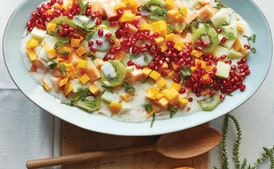

In [36]:
image

In [32]:
dish_name = 'Dish_name: ' +  final_df['Title'][0] + ' \n\n '
ingredients_string = dish_name + 'List of ingredients: '+ " \n ".join(final_df['Ingredients'][0])
ingredients_string = ingredients_string + " \n\n "
final_text = ingredients_string + 'Preparation instructions: ' + final_df['Instructions'][0]

print(final_text)

Dish_name: Miso-Butter Roast Chicken With Acorn Squash Panzanella 

 List of ingredients: 1 (3½–4-lb.) whole chicken 
 2¾ tsp. kosher salt, divided, plus more 
 2 small acorn squash (about 3 lb. total) 
 2 Tbsp. finely chopped sage 
 1 Tbsp. finely chopped rosemary 
 6 Tbsp. unsalted butter, melted, plus 3 Tbsp. room temperature 
 ¼ tsp. ground allspice 
 Pinch of crushed red pepper flakes 
 Freshly ground black pepper 
 ⅓ loaf good-quality sturdy white bread, torn into 1" pieces (about 2½ cups) 
 2 medium apples (such as Gala or Pink Lady; about 14 oz. total), cored, cut into 1" pieces 
 2 Tbsp. extra-virgin olive oil 
 ½ small red onion, thinly sliced 
 3 Tbsp. apple cider vinegar 
 1 Tbsp. white miso 
 ¼ cup all-purpose flour 
 2 Tbsp. unsalted butter, room temperature 
 ¼ cup dry white wine 
 2 cups unsalted chicken broth 
 2 tsp. white miso 
 Kosher salt, freshly ground pepper 

 Preparation instructions: Pat chicken dry with paper towels, season all over with 2 tsp. salt, and tie

### data base creation

In [1]:
from utilities.configure_script import ConfigurationLoader
from utilities.utils import read_json, read_txt

In [2]:
configs = ConfigurationLoader.get_config()

In [3]:
configs['paths']['recepies_path']['recepies_chunked_json']

'.\\assets\\recepies_chunked.json'

In [4]:
data = read_json(configs['paths']['recepies_path']['recepies_chunked_json'])

In [9]:
data[:1]

[{'Recepie': 'Dish name: Miso-Butter Roast Chicken With Acorn Squash Panzanella \n\n List of ingredients: \n• 1 (3½–4-lb.) whole chicken \n• 2¾ tsp. kosher salt, divided, plus more \n• 2 small acorn squash (about 3 lb. total) \n• 2 Tbsp. finely chopped sage \n• 1 Tbsp. finely chopped rosemary \n• 6 Tbsp. unsalted butter, melted, plus 3 Tbsp. room temperature \n• ¼ tsp. ground allspice \n• Pinch of crushed red pepper flakes \n• Freshly ground black pepper \n• ⅓ loaf good-quality sturdy white bread, torn into 1" pieces (about 2½ cups) \n• 2 medium apples (such as Gala or Pink Lady; about 14 oz. total), cored, cut into 1" pieces \n• 2 Tbsp. extra-virgin olive oil \n• ½ small red onion, thinly sliced \n• 3 Tbsp. apple cider vinegar \n• 1 Tbsp. white miso \n• ¼ cup all-purpose flour \n• 2 Tbsp. unsalted butter, room temperature \n• ¼ cup dry white wine \n• 2 cups unsalted chicken broth \n• 2 tsp. white miso \n• Kosher salt, freshly ground pepper \n\nPreparation instructions: Pat chicken dry

In [17]:
import numpy as np
import faiss

# Cargar los embeddings desde el archivo .npy
loaded_embeddings = np.load(configs['paths']['recepies_path']['recepies_embeddings'])
recepies_ids = read_txt(configs['paths']['recepies_path']['recepies_doc_ids'])

print(loaded_embeddings.shape)

# Inicializar FAISS y cargar los embeddings
d = loaded_embeddings.shape[1]
index = faiss.IndexFlatL2(d)
index_with_ids = faiss.IndexIDMap(index)

index_with_ids.add_with_ids(loaded_embeddings, recepies_ids)

(53104, 384)


In [45]:
from sentence_transformers import SentenceTransformer
sentences = ["full glass filled with berries"]

model = SentenceTransformer('sentence-transformers/all-MiniLM-L6-v2')
embeddings_query = model.encode(sentences)
embeddings_query = np.array(embeddings_query)
embeddings_query.shape

(1, 384)

In [46]:
# Realiza una búsqueda en el índice
D, I = index_with_ids.search(embeddings_query.astype('float32'), k=4)

print("Distancias:", D)
print("IDs de los resultados:", I)

Distancias: [[0.55282056 0.6208879  0.6546285  0.66227067]]
IDs de los resultados: [[ 4400  4393 12554  5389]]


In [47]:
I.tolist()[0][0]

4400

{'Recepie': 'Dish name: Berries and Rum \n\n List of ingredients: \n• 2 cups blackberries, frozen \n• 1 1/2 cups raspberries, frozen \n• 6 ounces light rum \n• 4 ounces simple syrup \n• 1 1/2 ounces fresh lime juice \n• 2 cups ice \n• Optional garnish: Blackberries \n\nPreparation instructions: Combine 2 cups blackberries, frozen + 1 1/2 cups raspberries, frozen + 6 ounces light rum + 4 ounces simple syrup + 1 1/2 ounces fresh lime juice + 2 cups ice. Optional garnish: Blackberries\n\nImage description: berries-and-rum-51240230 a glass filled with red liquid sitting on top of a white surface', 'Image': 'berries-and-rum-51240230', 'Image_base64': '/9j/4AAQSkZJRgABAQAAAQABAAD/4gIcSUNDX1BST0ZJTEUAAQEAAAIMbGNtcwIQAABtbnRyUkdCIFhZWiAH3AABABkAAwApADlhY3NwQVBQTAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA9tYAAQAAAADTLWxjbXMAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAApkZXNjAAAA/AAAAF5jcHJ0AAABXAAAAAt3dHB0AAABaAAAABRia3B0AAABfAAAABRyWFlaAAABkAAAABRnWFlaAAABpAAAABRiWFlaAAABuAAAABRyVFJDA

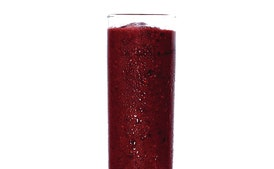

In [48]:
from PIL import Image
print(data[I.tolist()[0][0]])
image_path = configs['paths']['recepies_path']['images_folder'] + data[I.tolist()[0][0]]['Image'] + '.jpg'

image = Image.open(image_path)
image

In [10]:
recepies_ids[:9]

[0, 0, 0, 0, 1, 1, 1, 1, 2]

In [25]:
doc_ids

[0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2]

In [37]:
chunk_list[4]

'Crispy Salt and Pepper Potatoes'

In [38]:
doc_ids[4]

1

In [39]:
data[doc_ids[4]]['Recepie']

'Dish name: Crispy Salt and Pepper Potatoes \n\n List of ingredients: \n• 2 large egg whites \n• 1 pound new potatoes (about 1 inch in diameter) \n• 2 teaspoons kosher salt \n• ¾ teaspoon finely ground black pepper \n• 1 teaspoon finely chopped rosemary \n• 1 teaspoon finely chopped thyme \n• 1 teaspoon finely chopped parsley \n\nPreparation instructions: Preheat oven to 400°F and line a rimmed baking sheet with parchment. In a large bowl, whisk the egg whites until foamy (there shouldn’t be any liquid whites in the bowl). Add the potatoes and toss until they’re well coated with the egg whites, then transfer to a strainer or colander and let the excess whites drain. Season the potatoes with the salt, pepper, and herbs. Scatter the potatoes on the baking sheet (make sure they’re not touching) and roast until the potatoes are very crispy and tender when poked with a knife, 15 to 20 minutes (depending on the size of the potatoes).\nTransfer to a bowl and serve.\n\nImage description: crisp

In [17]:
lista

['Miso-Butter Roast Chicken With Acorn Squash Panzanella',
 '• 1 (3½–4-lb.) whole chicken \n• 2¾ tsp. kosher salt, divided, plus more \n• 2 small acorn squash (about 3 lb. total) \n• 2 Tbsp. finely chopped sage \n• 1 Tbsp. finely chopped rosemary \n• 6 Tbsp. unsalted butter, melted, plus 3 Tbsp. room temperature \n• ¼ tsp. ground allspice \n• Pinch of crushed red pepper flakes \n• Freshly ground black pepper \n• ⅓ loaf good-quality sturdy white bread, torn into 1" pieces (about 2½ cups) \n• 2 medium apples (such as Gala or Pink Lady; about 14 oz. total), cored, cut into 1" pieces \n• 2 Tbsp. extra-virgin olive oil \n• ½ small red onion, thinly sliced \n• 3 Tbsp. apple cider vinegar \n• 1 Tbsp. white miso \n• ¼ cup all-purpose flour \n• 2 Tbsp. unsalted butter, room temperature \n• ¼ cup dry white wine \n• 2 cups unsalted chicken broth \n• 2 tsp. white miso \n• Kosher salt, freshly ground pepper',
 'Pat chicken dry with paper towels, season all over with 2 tsp. salt, and tie legs togeth

In [33]:
import faiss
import numpy as np

# Suponiendo que tienes tus embeddings en `text_embeddings` y una lista de IDs
text_embeddings = np.array([[0.1, 0.2], [0.2, 0.3], [0.2, 0.2] ,[0.2, 0.1], [0.4, 0.5]]).astype('float32')
ids = np.array([102, 102, 102, 102, 103])  # Lista de IDs únicos para cada embedding

# Crea un índice FAISS normal
d = text_embeddings.shape[1]
index = faiss.IndexFlatL2(d)

# Envuélvelo en un IndexIDMap para agregar los IDs personalizados
index_with_ids = faiss.IndexIDMap(index)

# Agrega los embeddings con sus IDs
index_with_ids.add_with_ids(text_embeddings, ids)

# Realiza una búsqueda en el índice
D, I = index_with_ids.search(np.array([[0.2, 0.2]]).astype('float32'), k=3)

print("Distancias:", D)
print("IDs de los resultados:", I)

Distancias: [[0.   0.01 0.01]]
IDs de los resultados: [[102 102 102]]
